# Stock_Analytica
This script imports data from the master data list CSV and analyzes it for significant information.

Project Script PFD:

1. Stock_Query.ipynb
2. Stock_Analytica.ipynb

Importing Major Datasets & Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
master_ds = '../Resources/Master_Datasets/master_dataset_1577635349.csv'
meta_ds = '../Resources/S&P500_List.csv'

meta_df = pd.read_csv(meta_ds, encoding='ISO 8859-1')
master_df = pd.read_csv(master_ds)

In [4]:
meta_df

,ticker,security,sec_filings,gics_sector,gics_sub_industry,hq_location,date_first_added,cik,founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",5/31/2018,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,reports,Industrials,Industrial Machinery,"White Plains, New York",11/1/2011,1524472,NaN
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",10/6/1997,1041061,NaN
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",8/7/2001,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",6/22/2001,109380,NaN


Meta Data Analytics (Industries Present)

In [5]:
# creating dataset of unique company metadata
meta_merge_df = pd.DataFrame(master_df['Ticker'].unique()).rename(columns={0:'ticker'}).merge(meta_df, on='ticker')

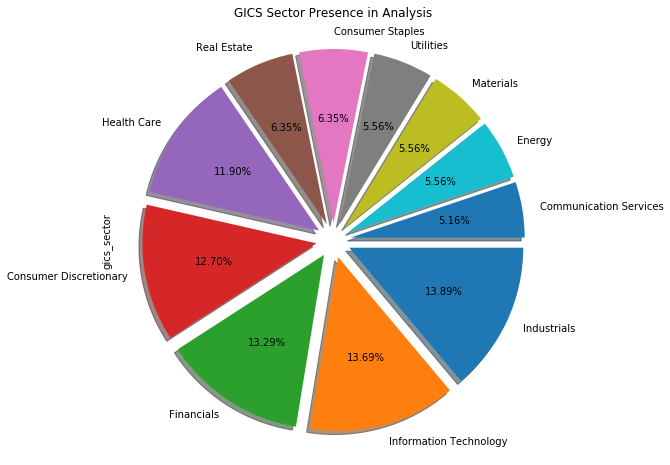

In [6]:
# reviewing GICS Sectors present in dataset
meta_merge_df['gics_sector'].value_counts().plot(
    kind='pie',
    figsize=(8,8),
    shadow=True,
    title='GICS Sector Presence in Analysis',
    counterclock=False,
    autopct='%.2f%%',
    explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
)


Amount of Unique Sub Industries: 127



,gics_sub_industry,count,percent
0,Health Care Equipment,18,3.57
1,Semiconductors,13,2.58
2,Industrial Machinery,13,2.58
3,Electric Utilities,13,2.58
4,Oil & Gas Exploration & Production,12,2.38
5,Data Processing & Outsourced Services,12,2.38
6,Packaged Foods & Meats,12,2.38
7,Multi-Utilities,11,2.18
8,Aerospace & Defense,11,2.18
9,Regional Banks,11,2.18


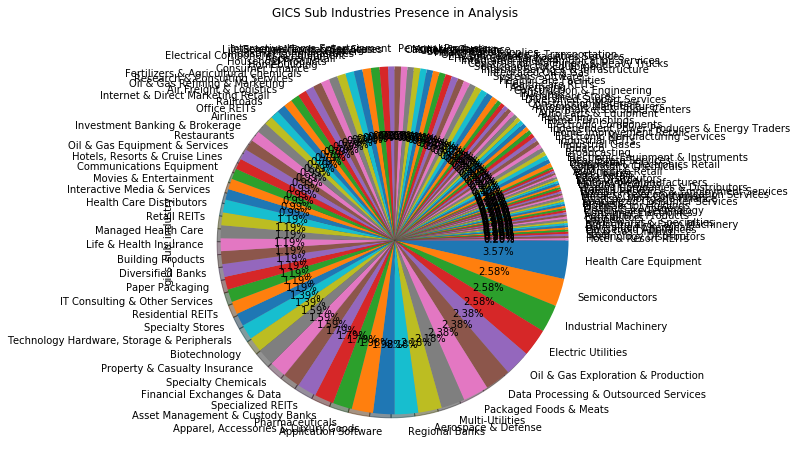

In [7]:
# reviewing GICS Sub Industries present in dataset
print(
f'''
Amount of Unique Sub Industries: {len(meta_merge_df['gics_sub_industry'].unique())}
'''
)

# plotting sub industries to showcase a wide distribution
meta_merge_df['gics_sub_industry'].value_counts().plot(
    kind='pie',
    figsize=(8,8),
    shadow=True,
    title='GICS Sub Industries Presence in Analysis',
    counterclock=False,
    autopct='%.2f%%'
)


# creating sub-industry data frame (there is too many to plot effectively)
si_df = pd.DataFrame(meta_merge_df['gics_sub_industry'].value_counts()).\
reset_index().\
rename(columns={
    'gics_sub_industry':'count',
    'index':'gics_sub_industry',
})

si_df['percent'] = round((si_df['count']/sum(si_df['count']))*100, 2)


si_df.head(10)

In [8]:
# acquiring peak-to-peak values for each stock
rec01_beg = master_df.loc[master_df['Date'] =='2001-01-31']
rec01_end = master_df.loc[master_df['Date'] =='2001-09-28']

rec01_df = pd.merge(rec01_beg, rec01_end, on='Ticker')
rec01_df.head()


# # other analysis stuff:
# rec_beg_2 = clean_stock_df.loc[clean_stock_df.index =='2007-09-28']
# rec_end_2 = clean_stock_df.loc[clean_stock_df.index =='2009-02-27']
# rec_1_df['Delta'] = ((rec_1_df['Close_y'] - rec_1_df['Close_x'])/rec_1_df['Close_x'])*100

,Date_x,Open_x,High_x,Low_x,Close_x,Volume_x,Ticker,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y
0,2001-01-31,111.40,112.90,110.40,110.70,2038900,MMM,2001-09-28,98.00,98.77,96.80,98.40,2447000
1,2001-01-31,44.95,45.20,43.44,44.86,6800500,ABT,2001-09-28,51.40,51.96,50.96,51.85,11185900
2,2001-01-31,24.06,24.13,22.06,22.56,755800,ABMD,2001-09-28,17.00,18.60,16.89,17.47,295900
3,2001-01-31,18.44,18.56,18.13,18.13,294033,ATVI,2001-09-28,24.85,28.00,24.70,27.22,1514667
4,2001-01-31,47.31,49.00,42.38,43.69,19054200,ADBE,2001-09-28,23.15,24.22,22.20,23.98,7599900


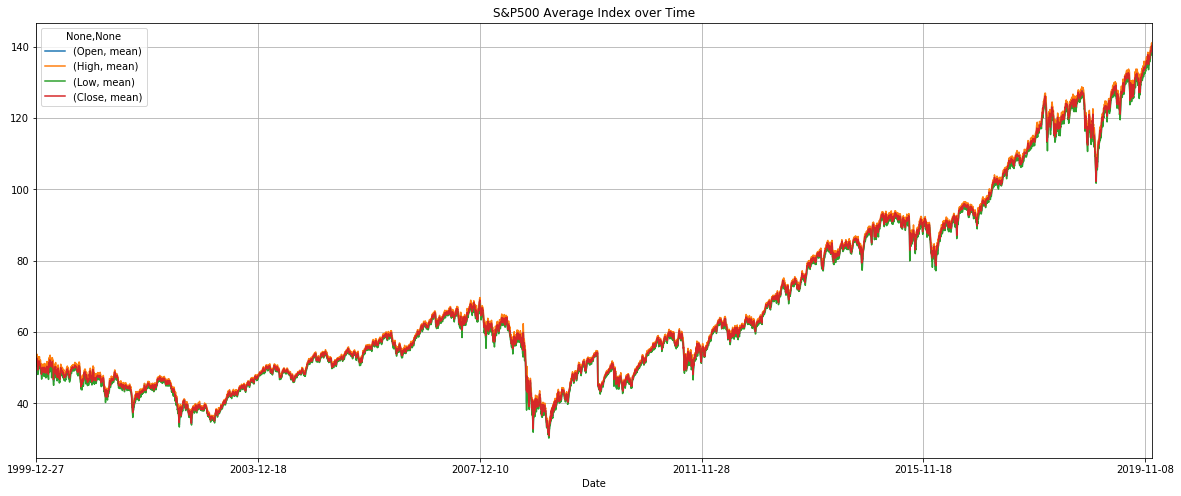

In [9]:
# Creating s&p500 average index
snp500_agg = master_df.groupby('Date').agg({
    'Open' : 'mean',
    'High' : 'mean',
    'Low' : 'mean',
    'Close' : 'mean',
    'Volume' : ['mean', 'var']
})

# viewing average stock values over time
snp500_agg[['Open', 'High', 'Low', 'Close']].plot(
    title='S&P500 Average Index over Time',
    grid=True,
    figsize=(20,8)
)

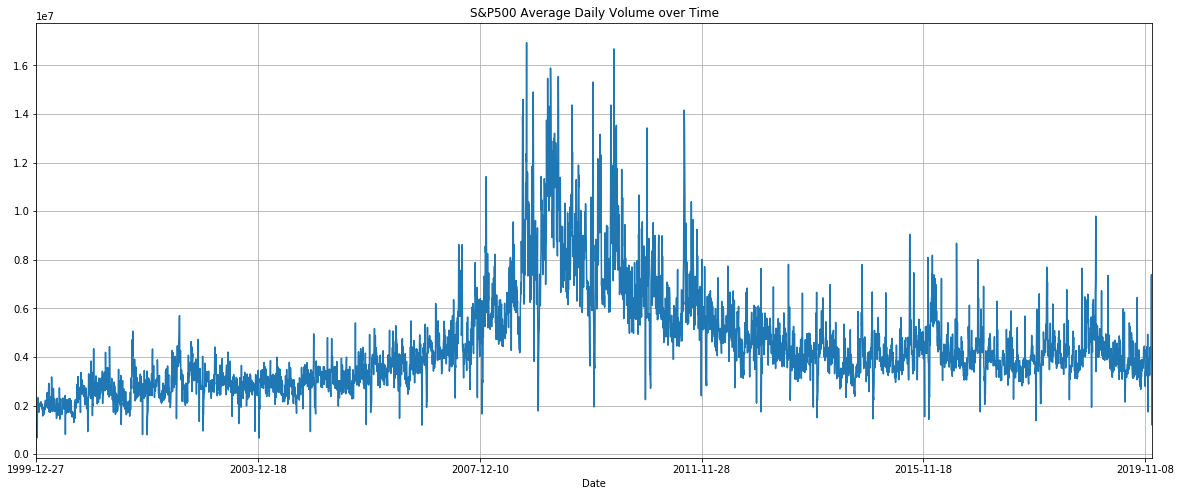

In [17]:
# view average volume movement over time
snp500_agg['Volume']['mean'].plot(
    title='S&P500 Average Daily Volume over Time',
    grid=True,
    figsize=(20,8)
)

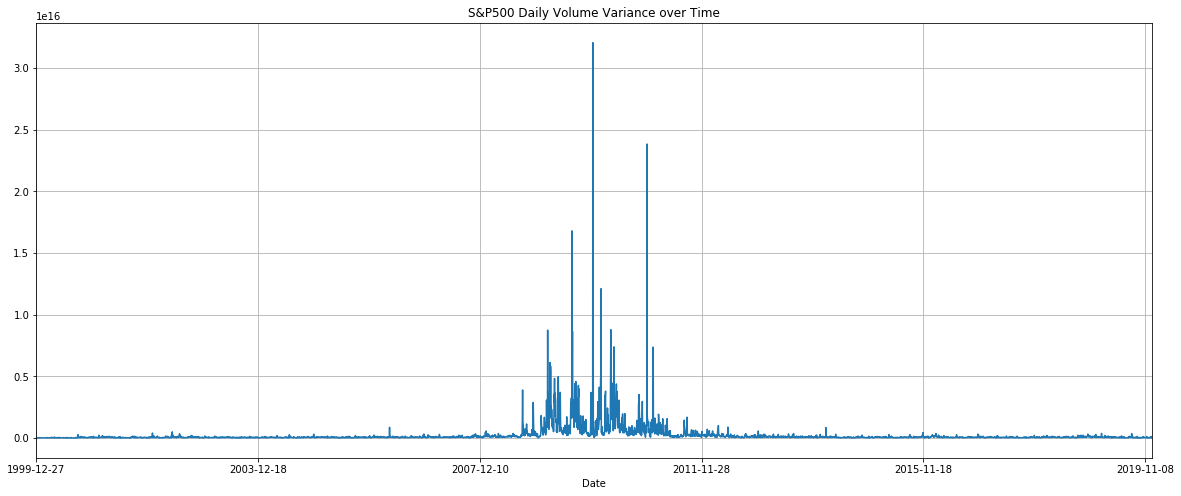

In [19]:
# view avergae volume variance over time
snp500_agg['Volume']['var'].plot(
    title='S&P500 Daily Volume Variance over Time',
    grid=True,
    figsize=(20,8)
)

In [25]:
snp500_agg.sort_values([('Volume', 'var')], ascending=False).head(10)

Open       High        Low      Close        Volume  \
                 mean       mean       mean       mean          mean   
Date                                                                   
2009-12-17  52.478330  52.834320  51.853708  52.204709  1.442538e+07   
2010-12-07  54.446028  54.769332  53.671941  53.898410  1.342500e+07   
2009-12-18  52.399294  52.820001  51.772606  52.444865  1.531402e+07   
2009-08-05  47.443088  48.283662  46.653848  47.635475  1.436914e+07   
2010-02-11  43.739541  44.526209  43.364256  44.302396  1.231000e+07   
2010-04-16  50.325595  50.721246  49.307014  49.730550  1.436343e+07   
2009-02-27  33.367783  34.850948  32.756335  33.804321  1.546340e+07   
2009-08-07  47.995859  48.872155  47.367308  48.323002  1.244052e+07   
2010-04-19  49.499239  50.142551  48.999626  49.779973  1.111368e+07   
2010-05-06  48.937087  49.605486  44.811473  47.723723  1.667707e+07   

                          
                     var  
Date                      
2009-12-17  3.204893e+16  
2010-12-07  2.383584e+16  
2009-12-18  1.801585e+16  
2009-08-05  1.679466e+16  
2010-02-11  1.210733e+16  
2010-04-16  8.782105e+15  
2009-02-27  8.749543e+15  
2009-08-07  8.656634e+15  
2010-04-19  8.084379e+15  
2010-05-06  7.391914e+15